架空の歯科健診データを用いて虫歯リスクを分析し、虫歯リスクと改善するための提案を提示するアプリケーションです。<br>教育目的に作成されたものであり、学術的な根拠ではありません。

シミュレーション用のCSVファイルをColab上で作成するコードです。以下のコードを実行するとダミーデータを作成できます。<br>このデータには、年齢、歯磨き回数、間食回数、虫歯本数が含まれます。

In [ ]:
import pandas as pd
import numpy as np

# ダミーデータの生成
np.random.seed(42)
num_samples = 100

data = {
    'age': np.random.randint(20, 60, num_samples),
    'brushing': np.random.randint(1, 4, num_samples),
    'snack': np.random.randint(0, 5, num_samples),
    'caries': np.random.randint(0, 5, num_samples) + (np.random.rand(num_samples) < 0.3).astype(int) * 3
}
df_dummy = pd.DataFrame(data)

#データの相関性の調整
df_dummy['caries'] = df_dummy['caries'] + (df_dummy['snack'] * 0.5).astype(int) - (df_dummy['brushing'] * 0.5).astype(int)
df_dummy['caries'] = df_dummy['caries'].apply(lambda x: max(0, x))

# CSVファイルとして保存
df_dummy.to_csv('dental_data.csv', index=False)

print("dental_data.csv が正常に作成されました。")
print(df_dummy.head())

dental_data.csv が正常に作成されました。
   age  brushing  snack  caries
0   58         3      4       7
1   48         3      0       6
2   34         2      0       4
3   27         1      2       4
4   40         3      1       1


以下は実際のアプリケーションです。

【読み込まれたデータ】
   age  brushing  snack  caries
0   58         3      4       7
1   48         3      0       6
2   34         2      0       4
3   27         1      2       4
4   40         3      1       1


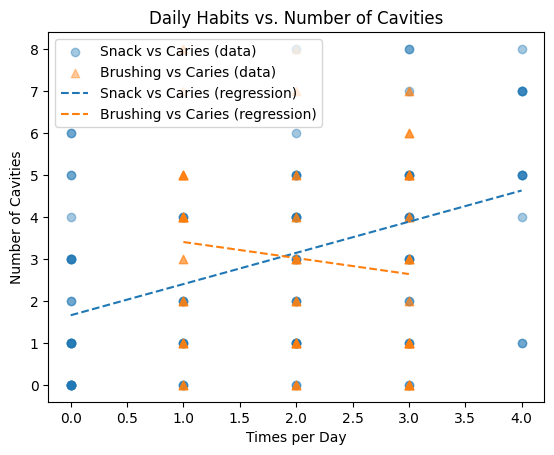


リスクスコアは以下のように計算されます：
年齢: 58.0 歳
歯磨き回数: 3.0 回/日
間食回数: 4.0 回/日
→ リスクスコア: 4.16

=== セルフチェック ===
年齢: 25
歯磨き回数: 2
間食回数: 2

あなたの虫歯リスク: 中リスク
リスクスコア: 1.50
平均リスクスコア: 1.48
平均との差: 0.02
このスコアは、学習データの上位 50.0% に相当します。上位10%以上の場合は注意が必要です。

【改善案】
- 現在の生活習慣は良好です。ぜひ継続しましょう！

※本結果は教育目的の簡易分析であり、実際の診断ではありません。


In [27]:
import numpy as np
import matplotlib.pyplot as plt


#データの読み込み
data = pd.read_csv("dental_data.csv")

print("【読み込まれたデータ】")
print(data.head())


#統計処理
for col in ["age", "brushing", "snack", "caries"]:
    mean = np.mean(data[col])
    std = np.std(data[col])


#グラフ表示
x_snack = data["snack"].values
x_brushing = data["brushing"].values
y = data["caries"].values

# ------------------------------
# 線形回帰
# ------------------------------
# 間食回数
a_snack, b_snack = np.polyfit(x_snack, y, 1)
x_snack_line = np.linspace(x_snack.min(), x_snack.max(), 100)
y_snack_pred = a_snack * x_snack_line + b_snack

# 歯磨き回数
a_brush, b_brush = np.polyfit(x_brushing, y, 1)
x_brush_line = np.linspace(x_brushing.min(), x_brushing.max(), 100)
y_brush_pred = a_brush * x_brush_line + b_brush

# ------------------------------
# グラフ描画
# ------------------------------
plt.figure()

# 散布図
plt.scatter(x_snack, y, marker="o", alpha=0.4, label="Snack vs Caries (data)")
plt.scatter(x_brushing, y, marker="^", alpha=0.4, label="Brushing vs Caries (data)")

# 回帰直線
plt.plot(x_snack_line, y_snack_pred, linestyle="--",
         label="Snack vs Caries (regression)")
plt.plot(x_brush_line, y_brush_pred, linestyle="--",
         label="Brushing vs Caries (regression)")

plt.xlabel("Times per Day")
plt.ylabel("Number of Cavities")
plt.title("Daily Habits vs. Number of Cavities")
plt.legend()
plt.show()


#虫歯リスクの計算
def calculate_risk(age, brushing, snack):
    """
    簡易的な虫歯リスクスコアを計算する関数
    """
    score = age * 0.02 + snack * 1.5 - brushing * 1.0
    return score


# 集団データのリスク計算
data["risk_score"] = calculate_risk(
    data["age"],
    data["brushing"],
    data["snack"]
)

mean_score = data["risk_score"].mean()
std_score = data["risk_score"].std()

example = data[["age", "brushing", "snack", "risk_score"]].iloc[0]

print("\nリスクスコアは以下のように計算されます：")
print(f"年齢: {example['age']} 歳")
print(f"歯磨き回数: {example['brushing']} 回/日")
print(f"間食回数: {example['snack']} 回/日")
print(f"→ リスクスコア: {example['risk_score']:.2f}")


#-----------------------------------
#アプリケーション
print("\n=== セルフチェック ===")
age = int(input("年齢を入力してください: "))
brushing = int(input("1日の歯磨き回数を入力してください: "))
snack = int(input("1日の間食回数を入力してください: "))

# Googlecolab用のデモ（inputが動かないため）
# age = 25
# brushing = 2
# snack = 2
# print(f"年齢: {age}")
# print(f"歯磨き回数: {brushing}")
# print(f"間食回数: {snack}")

user_score = calculate_risk(age, brushing, snack)

# リスク判定
if user_score < 1:
    risk_level = "低リスク"
elif user_score < 3:
    risk_level = "中リスク"
else:
    risk_level = "高リスク"

percentile = (data["risk_score"] < user_score).mean() * 100

print(f"\nあなたの虫歯リスク: {risk_level}")
print(f"リスクスコア: {user_score:.2f}")
print(f"平均リスクスコア: {mean_score:.2f}")
print(f"平均との差: {user_score - mean_score:.2f}")
print(f"このスコアは、学習データの上位 {percentile:.1f}% に相当します。上位10%以上の場合は注意が必要です。")


# 改善案
print("\n【改善案】")

if brushing < 2:
    print("- 歯磨き回数を1日2回以上に増やしましょう。")

if snack > 2:
    print("- 間食の回数を減らすと虫歯予防になります。")

if brushing >= 2 and snack <= 2:
    print("- 現在の生活習慣は良好です。ぜひ継続しましょう！")

print("\n※本結果は教育目的の簡易分析であり、実際の診断ではありません。")